In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, div.text_cell_render ol li p, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# <span style="color:red">ch9_시계열 데이터 분석 및 예측</span>
- pip install statsmodels==0.13.5 # 주기적인 데이터의 트렌드 추이
- pip install prophet # facebook에서 개발한 시계열 예측 lib

In [2]:
# %pip show statsmodels

In [3]:
#%pip show prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
plt.rc('font', family='Malgun Gothic') # 원도우즈에서 시각화시 한글 깨짐 방지
plt.rc('axes', unicode_minus=False) # 축의 '-' 깨짐 방지

In [5]:
# AirKoread 사이트에 다운로드
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
18245,20221231,구로구,0.037,0.009,0.5,0.004,43.0,29.0
18246,20221231,광진구,0.026,0.005,0.8,0.003,44.0,34.0
18247,20221231,관악산,0.008,0.038,0.3,0.005,29.0,18.0
18248,20221231,관악구,0.045,0.009,0.7,0.003,42.0,28.0
18249,20221231,공항대로,0.042,0.007,0.7,0.004,41.0,31.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
# 미세먼지농도(㎍/㎥) 결측치인 데이터
df[df['미세먼지농도(㎍/㎥)'].isna()]
# 결측치가 한 열이라도 있는 행
df[df.isna().any(axis=1)]

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
287,20220106,남산,0.033,0.015,0.7,0.004,NaN,NaN
339,20220107,남산,0.039,0.016,0.8,0.005,NaN,NaN
387,20220108,남산,0.048,0.011,0.8,0.004,NaN,NaN
437,20220109,남산,0.027,0.024,1.0,0.003,NaN,NaN
490,20220110,남산,0.049,0.012,1.0,0.003,NaN,NaN
...,...,...,...,...,...,...,...,...
15841,20221113,관악산,0.010,0.022,0.3,0.003,NaN,7.0
15842,20221113,관악구,NaN,NaN,NaN,NaN,NaN,NaN
16503,20221127,행주,NaN,NaN,NaN,NaN,24.0,10.0
16591,20221128,관악산,0.008,0.040,0.2,0.003,NaN,9.0


In [8]:
# 결측치가 한 열이라도 있는 행의 측정소명
df.loc[df.isna().any(axis=1), '측정소명'].unique()

array(['남산', '세곡', '관악산', '마포아트센터', '서대문구', '도산대로', '북한산', '항동', '동작구',
       '서초구', '동작대로', '행주', '올림픽공원', '동대문구', '송파구', '은평구', '한강대로', '강변북로',
       '시흥대로', '성북구', '관악구'], dtype=object)

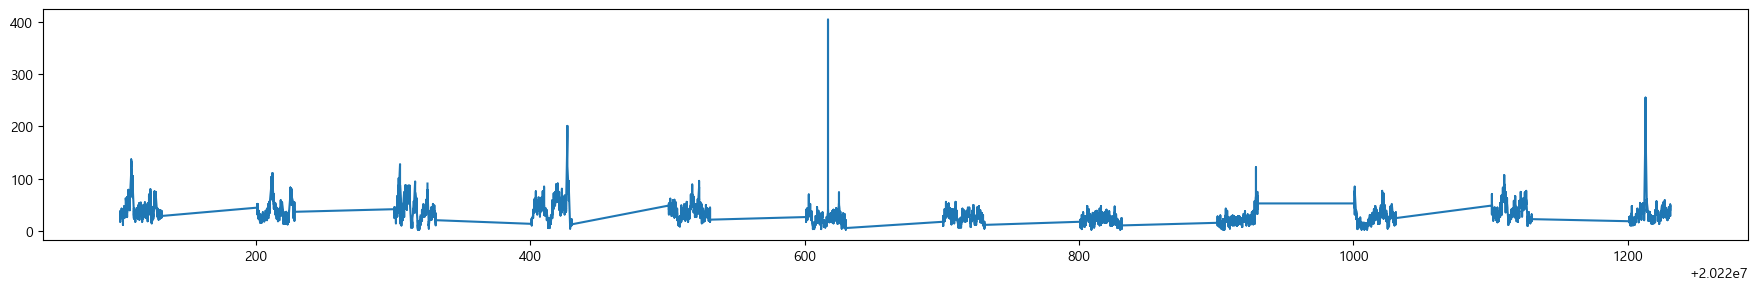

In [9]:
plt.figure(figsize=(22,3))
plt.plot(df['측정일시'], df['미세먼지농도(㎍/㎥)'])

In [10]:
# 측정일시 컬럼을 날짜형으로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
df['측정일'] = df['측정일시'].astype(str)
df.dtypes

측정일시              int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스농도(ppm)    float64
미세먼지농도(㎍/㎥)     float64
초미세먼지농도(㎍/㎥)    float64
측정일              object
dtype: object

In [12]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,20220101
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0,20220101
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0,20220101
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0,20220101
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0,20220101


In [13]:
df['측정일'] = df['측정일'].str[:4] + '-' + df['측정일'].str[4:6] + '-' + df['측정일'].str[6:]

In [14]:
df[['측정일시', '측정일']].sample()

,측정일시,측정일
11724,20220823,2022-08-23


In [15]:
#df['측정일'].astype('datetime64[ns]')
df['측정일'] = pd.to_datetime(df['측정일'])

In [16]:
df.dtypes

측정일시                     int64
측정소명                    object
이산화질소농도(ppm)           float64
오존농도(ppm)              float64
일산화탄소농도(ppm)           float64
아황산가스농도(ppm)           float64
미세먼지농도(㎍/㎥)            float64
초미세먼지농도(㎍/㎥)           float64
측정일             datetime64[ns]
dtype: object

In [17]:
# df의 열순서를 변경
cols = df.columns.tolist()
cols = [cols[0], cols[-1]] + cols[1:-1]
df = df[cols]
df.head(1)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0


In [18]:
df = df.drop('측정일시', axis=1)#.copy()

In [19]:
df.columns = ['측정일','측정소명','이산화질소농도', '오존농도', '일산화탄소농도',
             '아황산가스농도','미세먼지농도', '초미세먼지농도']
df.sample()

,측정일,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스농도,미세먼지농도,초미세먼지농도
11078,2022-08-10,북한산,0.006,0.039,0.4,0.002,13.0,6.0


In [30]:
# 결측치가 없는 측정소명만 추출
df_flt = df[df['측정소명']=='공항대로']

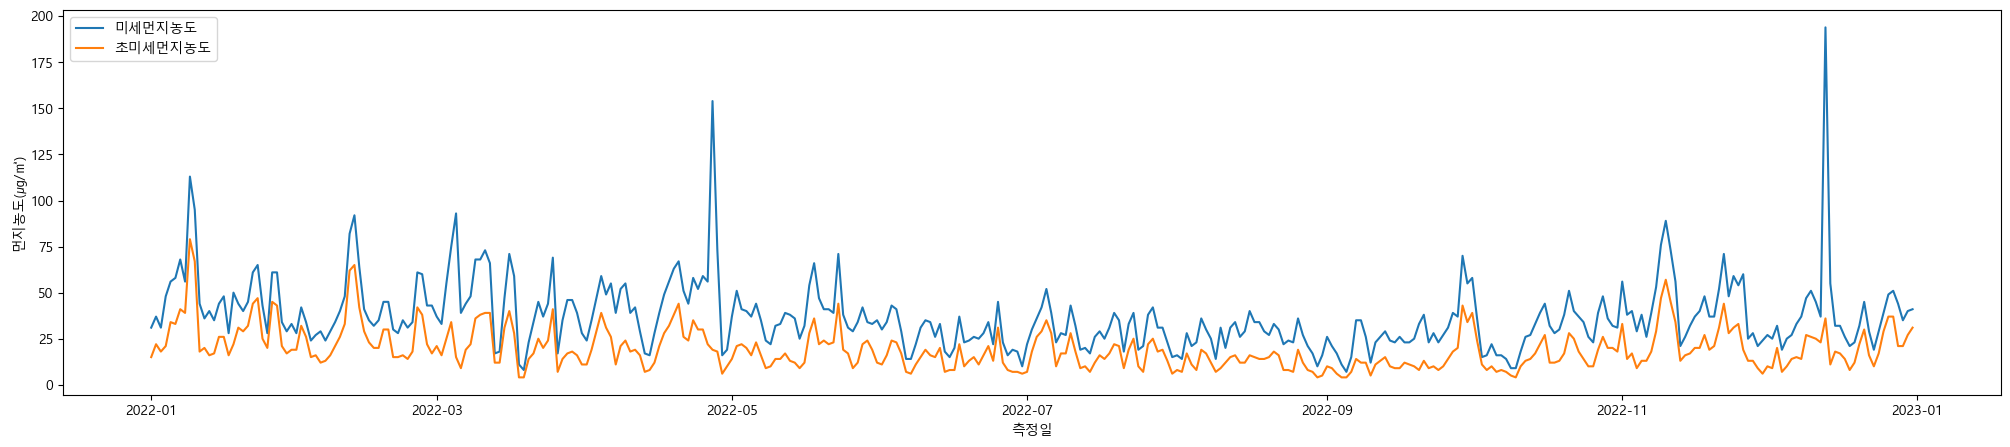

In [31]:
# 미세먼지농도, 초미세먼지농도 시계열 데이터 시각화
plt.figure(figsize=(25,5))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도'], label='미세먼지농도')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도'], label='초미세먼지농도')
plt.xlabel('측정일')
plt.ylabel('먼지농도(㎍/㎥)')
plt.legend(loc='upper left')
plt.show()

### statsmodels 
- 결측치가 없는 데이터에서 주기적인 데이터의 트렌드 추이. 
- 날짜형 인덱스와 데이터 컬럼

In [36]:
df_flt2 = df_flt[['측정일','미세먼지농도']]
ts = df_flt2.set_index('측정일')
ts.head(3)

,미세먼지농도
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0


In [44]:
# 시계열 데이터의 구조를 분해하는 도구 : 실제값 추세, 계절성, 잔차를 분석
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['미세먼지농도'],
                           period=30) # 30일 단위로 계절성을 분석해 봐
# result.observed : 실제 데이터
# result.trend # 데이터의 장기적인 변화, 전반적으로 감소, 증가
# result.seasonal # 주기적인 계절성 패텅
# result.resid # 잔차(실제값에서 추세와 계정성을 뺀 노이즈)
fig, 

측정일
2022-01-01   -7.285589
2022-01-02   -0.520438
2022-01-03   -0.143165
2022-01-04    4.140168
2022-01-05    0.079562
                ...   
2022-12-27   -7.285589
2022-12-28   -0.520438
2022-12-29   -0.143165
2022-12-30    4.140168
2022-12-31    0.079562
Name: seasonal, Length: 365, dtype: float64

In [38]:
result